# Sampling Methods

In [35]:
import numpy as np
import pylab as plt

## Standard Distribution
### Exponential

>Transform the samples of an uniform distribution into samples from an exponential one (using the inversion method).
> $$p(x | \lambda)=\left\{\begin{array}{ll}
\lambda \mathrm{e}^{-\lambda x} & x \geq 0 \\
0 & x<0 \end{array}\right.$$

(array([9.03349194e-01, 7.75182663e-01, 6.52637470e-01, 5.34027215e-01,
        4.63198342e-01, 3.93493737e-01, 3.22664865e-01, 2.41155448e-01,
        1.97309003e-01, 1.97309003e-01, 1.61332432e-01, 1.41095612e-01,
        1.02308372e-01, 9.16278274e-02, 7.30774084e-02, 6.01483284e-02,
        5.00299180e-02, 4.27221772e-02, 3.65387042e-02, 2.92309633e-02,
        2.58581599e-02, 2.58581599e-02, 1.79882851e-02, 1.85504190e-02,
        8.43200866e-03, 7.86987475e-03, 3.37280346e-03, 1.06805443e-02,
        7.30774084e-03, 2.81066955e-03, 5.05920519e-03, 3.37280346e-03,
        1.12426782e-03, 2.81066955e-03, 2.81066955e-03, 1.12426782e-03,
        1.12426782e-03, 5.62133910e-04, 2.24853564e-03, 0.00000000e+00,
        0.00000000e+00, 5.62133910e-04, 5.62133910e-04, 1.12426782e-03,
        5.62133910e-04, 0.00000000e+00, 0.00000000e+00, 5.62133910e-04,
        0.00000000e+00, 5.62133910e-04]),
 array([2.93503986e-05, 1.77922906e-01, 3.55816461e-01, 5.33710017e-01,
        7.11603572e-01

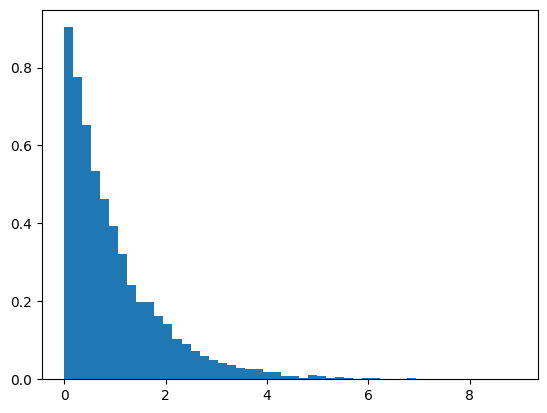

In [36]:
class ExponentialDistribution:
    def __init__(self, lmb):
        self.lmb = lmb


    def sample(self, n_samples):
        uniform_samples = np.random.rand(n_samples)
        return -np.log(1 - uniform_samples) / self.lmb

n_samples = 10000
dist = ExponentialDistribution(lmb=1)
y = dist.sample(n_samples)

# Plot the samples
plt.hist(y, bins=50, density=True)

### Cosine
> Transform the samples of an uniform distribution into samples from the following pdf (using the inversion method):
> $$p(x) = \left\{\begin{array}{lll}
0 & x<0 \\
\cos (x)& x \in [0, \pi/2] \\
0 & x>\pi/2
\end{array}\right.$$

(array([0.99087037, 1.15816018, 0.9426137 , 0.95226503, 1.01982438,
        1.01339015, 1.02304149, 0.89435702, 0.97478481, 0.89435702,
        1.00695593, 0.92009392, 0.73993567, 0.8332319 , 0.97478481,
        0.93617948, 0.87827147, 0.84610035, 0.84288324, 0.8589688 ,
        0.76567256, 0.78819234, 0.69489611, 0.69811322, 0.68846188,
        0.72706722, 0.64985654, 0.67559344, 0.63055387, 0.63055387,
        0.66272499, 0.53082341, 0.62090254, 0.48256674, 0.54047475,
        0.48578385, 0.39570473, 0.35709939, 0.39570473, 0.36353361,
        0.29919138, 0.28632293, 0.24771759, 0.20267803, 0.18659247,
        0.16085558, 0.09329624, 0.12546735, 0.04182245, 0.04182245]),
 array([2.75299110e-05, 3.11113133e-02, 6.21950966e-02, 9.32788800e-02,
        1.24362663e-01, 1.55446447e-01, 1.86530230e-01, 2.17614013e-01,
        2.48697797e-01, 2.79781580e-01, 3.10865363e-01, 3.41949147e-01,
        3.73032930e-01, 4.04116713e-01, 4.35200497e-01, 4.66284280e-01,
        4.97368064e-01, 5.2845

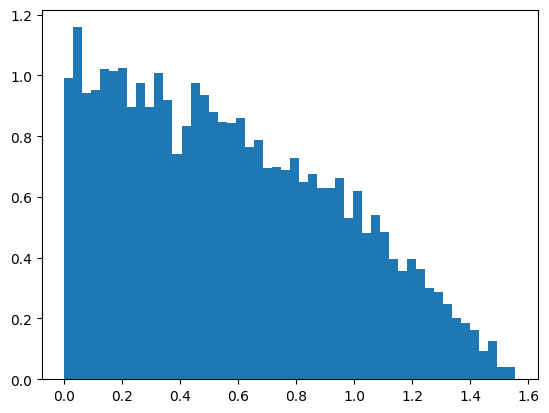

In [37]:
class CosineDistribution:
    def __init__(self, lmb):
        self.lmb = lmb



    def sample(self, n_samples):
        uniform_samples = np.random.rand(n_samples)
        # inverse of the CDF
        return [np.arcsin(x) / self.lmb if (x <= np.pi/2 and x >= 0) else 0 for x in uniform_samples]


n_samples=10000
dist = CosineDistribution(lmb=1)
y = dist.sample(n_samples)

# Plot the samples
plt.hist(y, bins=50, density=True)

### Logistic Distribution
>Transform the samples of an uniform distribution into samples from the following pdf (using the inversion method):
>$$p(x) = \frac{e^{-x}}{\left(1+e^{-x}\right)^{2}} \quad F(x) = \frac{1}{1+e^{-x}}$$

F(X) nach x auflösen -> gibt inverse der CDF. F(x) ist als Variable zu sehen und nicht als tatsächlicher Funktionswert. Also F(x) entspricht den uniform samples.

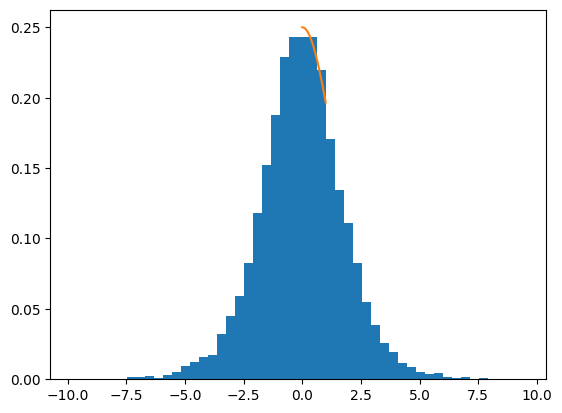

In [38]:
class LogisticDistribution:
    def __init__(self, lmb):
        self.lmb = lmb


    def sample(self, n_samples):
        uniform_samples = np.random.rand(n_samples)
        return -np.log(1/(uniform_samples)-1)/self.lmb


n_samples = 10000
dist = LogisticDistribution(lmb=1)
y = dist.sample(n_samples)

# Plot the samples
plt.hist(y, bins=50, density=True)
x = np.linspace(0, 1, 1000)
p_x = np.exp(-x)/((1+np.exp(-x))**2)
plt.plot(x, p_x, label='Logistic PDF')

## Box Muller

> Implement the box muller algorithm to create samples from a **bivariate** normal distribution. Compare these samples, e.g., with a scatter plot.

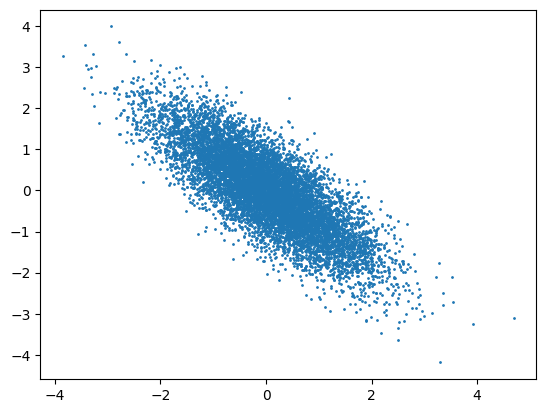

In [39]:
class BivNormDistribution:
    def __init__(self, mu, cov_matr):
        self.mu = mu
        self.cov_matr = cov_matr
        self.L = np.linalg.cholesky(cov_matr)


    def sample(self, n_samples):
        uniform_samples = np.random.rand(n_samples,2)
        z1, z2 = 2*uniform_samples[:,0]-1, 2*uniform_samples[:,1]-1
        r = z1**2 + z2**2   # VL: r**2
        z1 = [z1[i] for i in range(len(r)) if r[i] <= 1]
        z2 = [z2[i] for i in range(len(r)) if r[i] <= 1]
        r = [r[i] for i in range(len(r)) if r[i] <= 1]
        while len(z1) < n_samples:
            uniform_samples = np.random.rand(n_samples,2)
            z1_new, z2_new = 2*uniform_samples[:,0]-1, 2*uniform_samples[:,1]-1
            r_new = z1_new**2 + z2_new**2
            z1 = z1 + [z1_new[i] for i in range(len(r_new)) if r_new[i] <= 1]
            z2 = z2 + [z2_new[i] for i in range(len(r_new)) if r_new[i] <= 1]
            r = r + [r_new[i] for i in range(len(r_new)) if r_new[i] <= 1]
            
        y1 = z1*np.sqrt(-2*np.log(r)/r)
        y2 = z2*np.sqrt(-2*np.log(r)/r)

        norm_samples = np.column_stack((y1, y2))[:n_samples]
        #print(self.L.shape, norm_samples.shape)
        return norm_samples @ self.L.T + self.mu

    
n_samples = 10000
dist = BivNormDistribution(mu=0, cov_matr=np.array([[1, -0.8], [-0.8, 1]]))
norm_samples = dist.sample(n_samples)
plt.scatter(norm_samples[:, 0], norm_samples[:, 1], s=1)

## Box Muller for Mixture of Gaussians - Ancestral Sampling

> Extend the code above to create samples from a mixture of Gaussians.

In [40]:
x  = np.array([])
print(x.shape)

(0,)


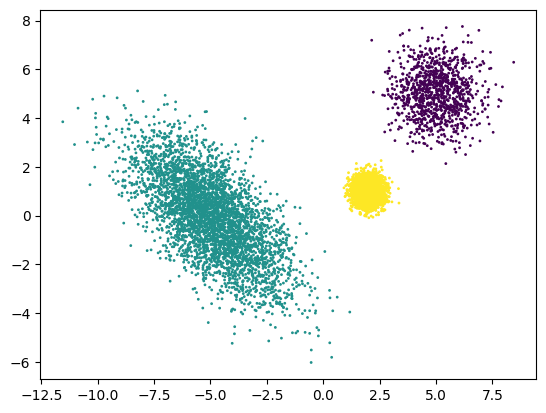

In [41]:
coefs = [0.1, 0.4, 0.5]
means = [[5, 5], [-5, 0], [2, 1],]
covs = [
    [[1, 0], [0, 1]],
    [[3, -2], [-2, 3]],
    [[.1, 0], [0, .1]],
]
sample_size = 200

class MixtureBivNormDistribution:
    def __init__(self, coefs, means, covs):
        self.coefs = coefs
        self.means = means
        self.covs = covs
        self.dists = [BivNormDistribution(mu, cov) for mu, cov in zip(means, covs)]


    def sample(self, n_samples):
        samples = []
        distr_idx = []
        dist_idx = np.random.choice(len(self.coefs), size=(n_samples),p=self.coefs)
        for dist_idx in dist_idx:
        #while True:
            sample = self.dists[dist_idx].sample(1)
            # if(len(sample.shape) != 2):
            samples.append(sample[0])
            #     break
            distr_idx.append(dist_idx)
        return np.array(samples), np.array(distr_idx)
    
n_samples = 10000
dist = MixtureBivNormDistribution(means=means, covs=covs, coefs=coefs)
norm_samples, distr_idx = dist.sample(n_samples)
plt.scatter(norm_samples[:, 0], norm_samples[:, 1], s=1, c=distr_idx)

## Rejection Sampling

> Implement rejection sampling that allows the generation of samples from $p(z)$ using a proposal distribution $q$. Plot your samples to confirm your result.
> How is the selection of the proposal function effecting the efficiency of the rejection sampling algorithm?

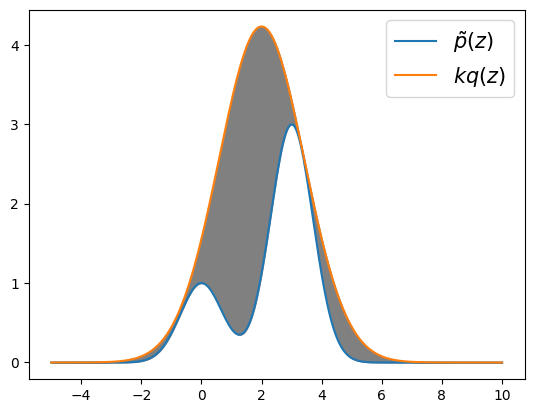

In [42]:
from scipy.stats import norm as gauss
np.random.seed(42)


k = 15
# You can use q_dist.rvs to sample from the Gaussian.
q_dist = gauss(loc=np.array([2.]), scale=np.sqrt([2]))
def p_dist(x):
    return np.exp(-x ** 2) + 3 * np.exp(-(x - 3) ** 2)


axis = np.linspace(-5, 10, 301)
plt.plot(axis, p_dist(axis), label=r"$\tilde{p}(z)$")
plt.plot(axis, k * q_dist.pdf(axis), label=r"$kq(z)$")
plt.fill_between(axis, p_dist(axis), k * q_dist.pdf(axis), color="gray")
plt.legend(fontsize=15)
plt.show()

In [43]:
class RejectionSampling():
    def __init__(self, p_dist, q_dist, k):
        self.p_dist = p_dist
        self.q_dist = q_dist
        self.k = k

    def sample(self, n_samples):
        samples = []
        while len(samples) < n_samples:
            sample = self.q_dist.rvs()
            u = np.random.rand() * self.k * self.q_dist.pdf(sample)
            if u < self.p_dist(sample):
                samples.append(sample)
        return np.array(samples)

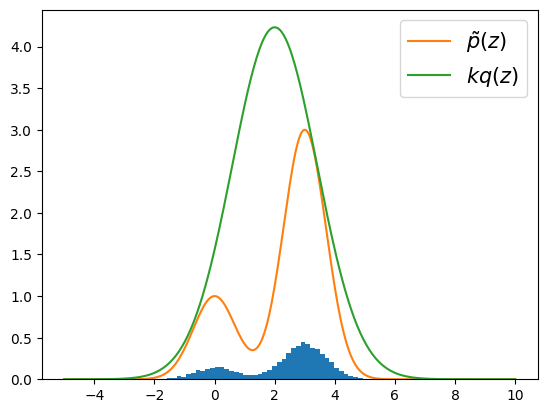

In [44]:
n_samples = 10000
rs = RejectionSampling(p_dist, q_dist, k)
samples = rs.sample(n_samples)
plt.hist(samples, bins=50, density=True)
plt.plot(axis, p_dist(axis), label=r"$\tilde{p}(z)$")
plt.plot(axis, k * q_dist.pdf(axis), label=r"$kq(z)$")
plt.legend(fontsize=15)

if proposal function is too big, many samples are rejected. 